In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [3]:
# loading groceries dataset
df = pd.read_csv("Dataset/Groceries_dataset.csv")
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# checking dataset structure

df.info()



<class 'pandas.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Member_number    38765 non-null  int64
 1   Date             38765 non-null  str  
 2   itemDescription  38765 non-null  str  
dtypes: int64(1), str(2)
memory usage: 908.7 KB


In [6]:
# checking missing values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
# checking duplicate rows

df.duplicated().sum()


np.int64(759)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# number of unique products

df["itemDescription"].nunique()


167

In [ ]:
# converting transaction data into Basket Format

In [11]:
# grouping items by Member_number
transactions = df.groupby("Member_number")["itemDescription"].apply(list)
transactions.head()


Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
Name: itemDescription, dtype: object

In [23]:
# converting transaction list into one-hot encoded format
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

basket = pd.DataFrame(te_array, columns=te.columns_)

basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
#EDA

In [14]:
# total transactions
df["Member_number"].nunique()


3898

In [15]:
# total unique products

df["itemDescription"].nunique()


167

In [16]:
# top 10 most frequent products
top_products = df["itemDescription"].value_counts().head(10)

top_products


itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

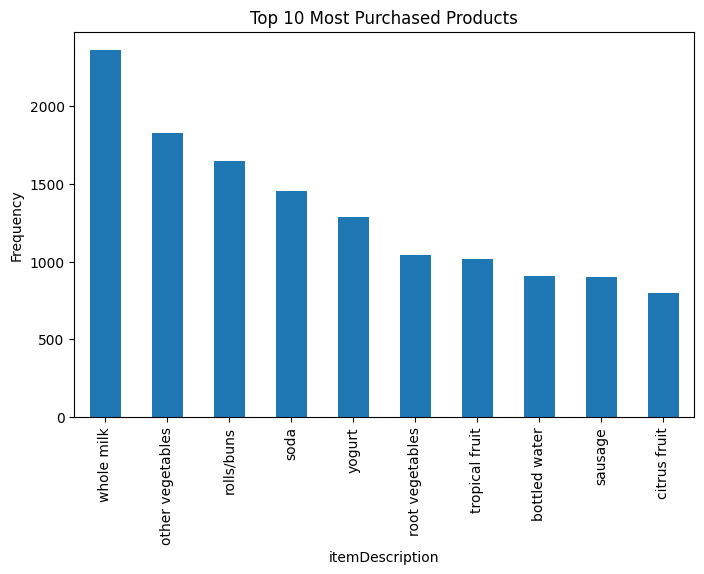

In [18]:
# plotting top 10 products
plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Top 10 Most Purchased Products")
plt.ylabel("Frequency")
plt.show()


Outcome of EDA
1. Checked total number of transactions to understand dataset size.
2. Found number of unique products available in the dataset.
3. Identified top 10 most frequently purchased products to understand customer buying behavior
4. Bar chart of top products to visually analyze popular items
5. understood general purchasing patterns before applying the apriori algorithm.

In [ ]:
#Apply Apriori algorithm

In [24]:
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)
frequent_items.head()

,support,itemsets
0,0.078502,frozenset({UHT-milk})
1,0.031042,frozenset({baking powder})
2,0.119548,frozenset({beef})
3,0.079785,frozenset({berries})
4,0.062083,frozenset({beverages})


In [25]:
#Checking no of itemsets
len(frequent_items)


894

In [26]:
# increasing support to reduce number of itemsets
frequent_items = apriori(basket, min_support=0.03, use_colnames=True)

frequent_items.head()

,support,itemsets
0,0.078502,frozenset({UHT-milk})
1,0.031042,frozenset({baking powder})
2,0.119548,frozenset({beef})
3,0.079785,frozenset({berries})
4,0.062083,frozenset({beverages})


In [ ]:
#Association Rules

In [27]:
# generating association rule
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({UHT-milk}),frozenset({whole milk}),0.078502,0.458184,0.040534,0.516340,1.126928,1.0,0.004565,1.120242,0.122227,0.081696,0.107336,0.302403
1,frozenset({beef}),frozenset({whole milk}),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,frozenset({bottled beer}),frozenset({whole milk}),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
3,frozenset({bottled water}),frozenset({whole milk}),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
4,frozenset({brown bread}),frozenset({whole milk}),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752


In [28]:
len(rules) #checking len of total rule generated


94

In [30]:
# filtering rules with lift greater than 1
rules = rules[rules["lift"] > 1]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({UHT-milk}),frozenset({whole milk}),0.078502,0.458184,0.040534,0.516340,1.126928,1.0,0.004565,1.120242,0.122227,0.081696,0.107336,0.302403
1,frozenset({beef}),frozenset({whole milk}),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,frozenset({bottled beer}),frozenset({whole milk}),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
3,frozenset({bottled water}),frozenset({whole milk}),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
4,frozenset({brown bread}),frozenset({whole milk}),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752


In [ ]:
#Visualizing results

In [31]:
# sorting frequent itemsets by support
top_items = frequent_items.sort_values("support", ascending=False).head(10)

top_items


,support,itemsets
70,0.458184,frozenset({whole milk})
44,0.376603,frozenset({other vegetables})
53,0.349666,frozenset({rolls/buns})
60,0.313494,frozenset({soda})
71,0.282966,frozenset({yogurt})
65,0.233710,frozenset({tropical fruit})
54,0.230631,frozenset({root vegetables})
6,0.213699,frozenset({bottled water})
56,0.206003,frozenset({sausage})
260,0.191380,"frozenset({other vegetables, whole milk})"


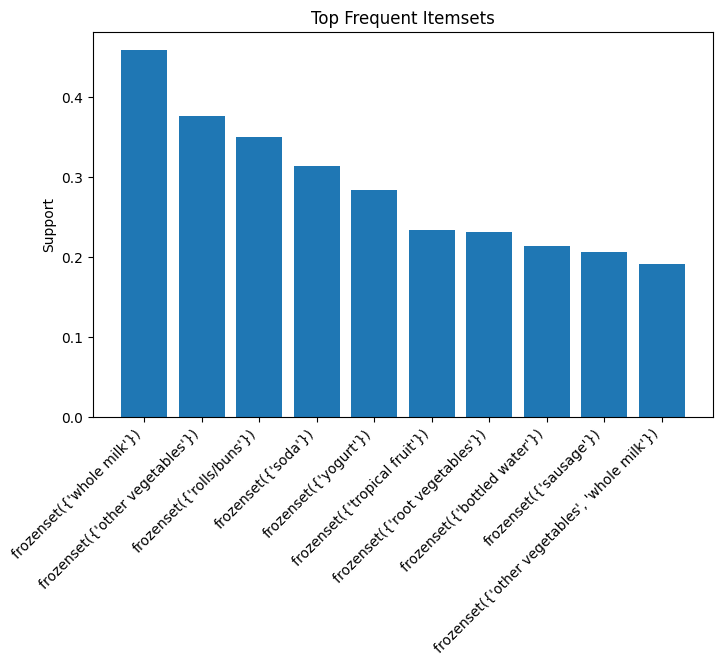

In [32]:
# bar chart for top frequent itemsets
plt.figure(figsize=(8,5))
plt.bar(range(len(top_items)), top_items["support"])
plt.xticks(range(len(top_items)), top_items["itemsets"].astype(str), rotation=45, ha="right")
plt.title("Top Frequent Itemsets")
plt.ylabel("Support")
plt.show()

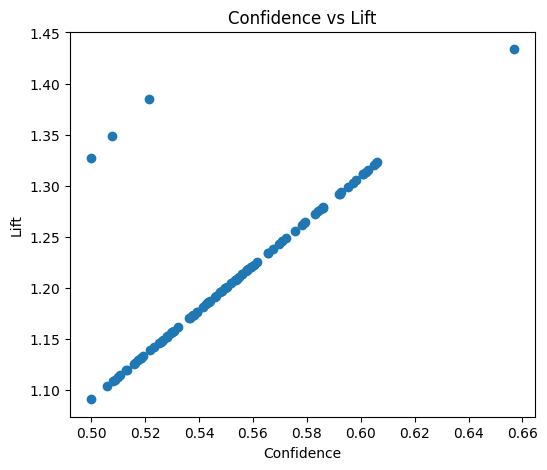

In [33]:
# scatter plot for association rules
plt.figure(figsize=(6,5))
plt.scatter(rules["confidence"], rules["lift"])
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Confidence vs Lift")
plt.show()

Observations
1. Some products appear frequently together in customer transactions indicating strong associations.
2. Association rules with higher confidence and lift values represent meaningful product combinations.
3. Certain items act as key products that drive additional purchases.
4. The scatter plot shows multiple strong rules where both confidence and lift are high.
5. Frequent itemsets indicate commonly purchased product groups.

Business Insights (Cross-selling ideas)
--Products frequently bought together can be placed closer in stores or suggested together online.
--High confidence rules can be used for product recommendations.
--Promotional bundles can be created for strongly associated items.
--Key products identified from itemsets can be used to increase basket value.
--Marketing strategies can be optimized based on customer purchasing behavior.

## Conclusion


#### In this project Market Basket Analysis was performed using grocery transaction data. The Apriori algorithm was applied to identify frequent itemsets and association rules. Product combinations were analyzed using confidence and lift values and visualized using bar charts and scatter plots. Based on the results meaningful purchasing patterns were identified which can help improve cross-selling strategies. This project helped in understanding customer buying behavior and practical application of association rule mining.